# Evaluation of the impact of killing settlements without agriculture cells
In the original version of the model, settlements that do not have agriculture cells after 5 years are removed. This is an ad hoc asumption and inconsistent in a number of ways.
If the product of agriculture can not be substituted by that from ecosystems or trade, there should be some impact on demographics before the death of the settlement.
If agriculture can be substituted by using trade and ecosystem services however, killing settlements withou agriculture is nonsensical.

Therefore, I test the model without killing settlements without agriculture to see the difference.

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


data = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/X1_default/results/mayasim_default_setup')
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, 2))

def plotlines(data, level, key, unstack):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ln = data['<mean_trajectories>'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, color=cls)
    lg = ln.get_legend()
    bb = lg.get_bbox_to_anchor().inverse_transformed(ax1.transAxes)
    xOffset = .3
    bb.x0 += xOffset
    bb.x1 += xOffset
    lg.set_bbox_to_anchor(bb, transform = ax1.transAxes)
    ax1.set_ylabel(key[0])
data.head()

Populating the interactive namespace from numpy and matplotlib


key                                                       <mean_trajectories>  \
kill_cropless timesteps observables                                             
False         0         agricultural_productivity_income             0.160719   
                        forest_state_1_cells                         4.400000   
                        forest_state_2_cells                      1201.200000   
                        forest_state_3_cells                     99674.400000   
                        forst_income                                 0.249981   

key                                                       <sigma_trajectories>  
kill_cropless timesteps observables                                             
False         0         agricultural_productivity_income              0.001458  
                        forest_state_1_cells                          2.503331  
                        forest_state_2_cells                         32.953840  
                        forest_state_3_cells                         32.239382  
                        forst_income                                  0.014727

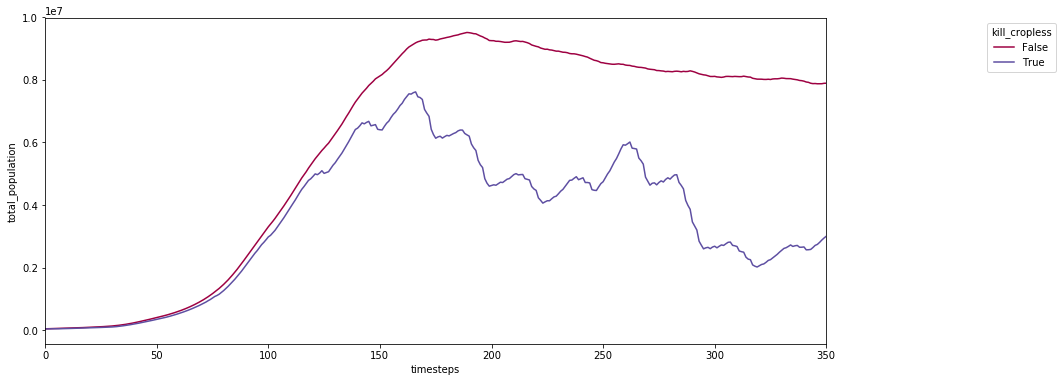

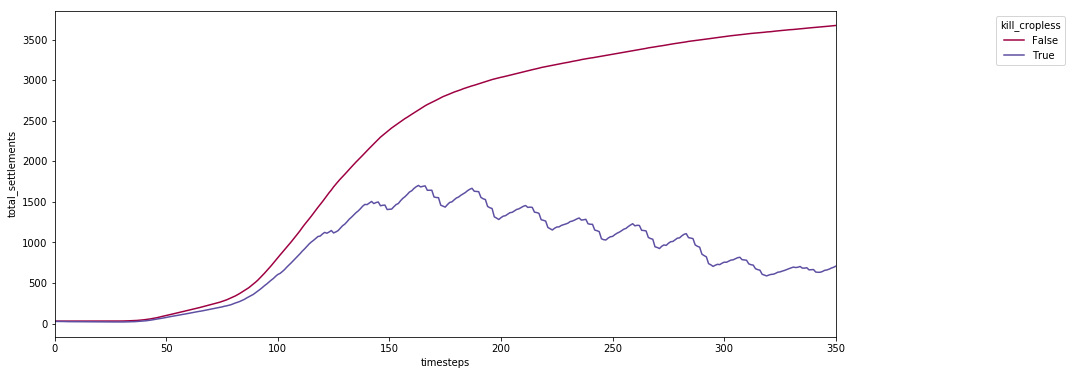

In [17]:
key=['total_population']
level=['observables']
unstack = ['kill_cropless']

plotlines(data, level, key, unstack)

key=['total_settlements']
level=['observables']
unstack = ['kill_cropless']


plotlines(data, level, key, unstack)

Killing of cities without crops obviously makes a huge difference. Leaving cities without crops alive leads to significantly less pronounced overshoot and collapse behavior in population and no collapse in number of settlements. 
Although I wonder, if settlements do propperly die from low population.

The different sources of income for both conditions are shown below:


(0, 5000000)

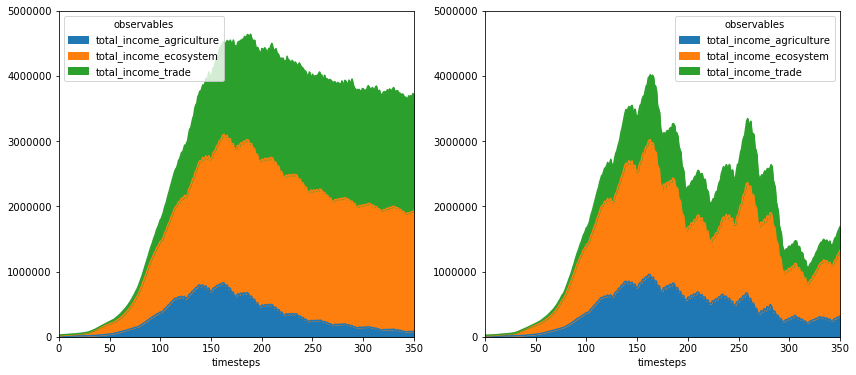

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
data['<mean_trajectories>'].xs(level='kill_cropless', key=False).unstack('observables')[['total_income_agriculture', 'total_income_ecosystem', 'total_income_trade']].plot.area(ax=ax1)
ax2 = fig.add_subplot(122)
data['<mean_trajectories>'].xs(level='kill_cropless', key=True).unstack('observables')[['total_income_agriculture', 'total_income_ecosystem', 'total_income_trade']].plot.area(ax=ax2)
ax1.set_ylim([0, 5000000])
ax2.set_ylim([0, 5000000])

To compare the two conditions better, lets have a look at the different source of income separately:


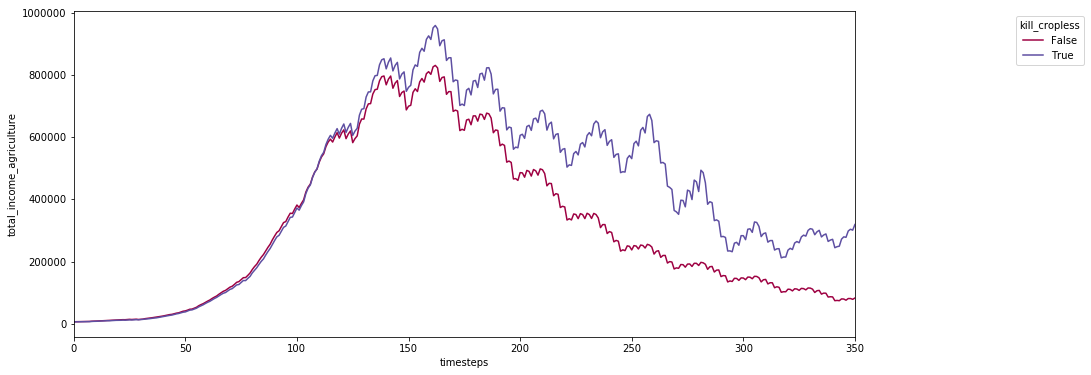

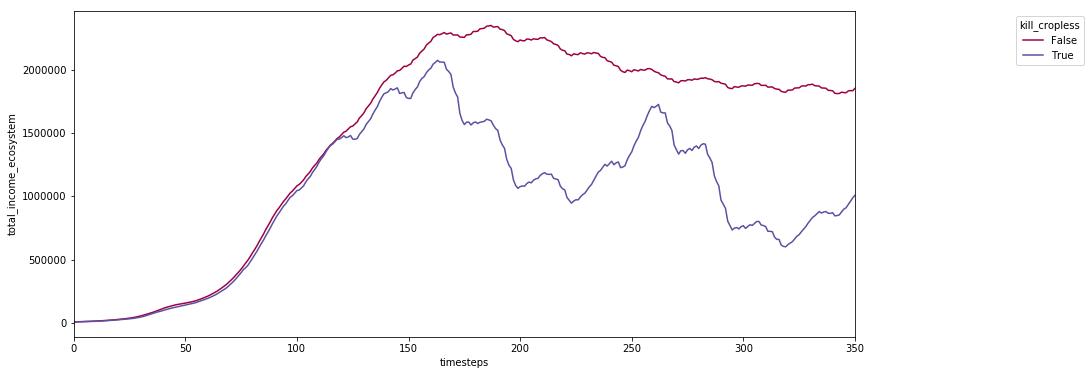

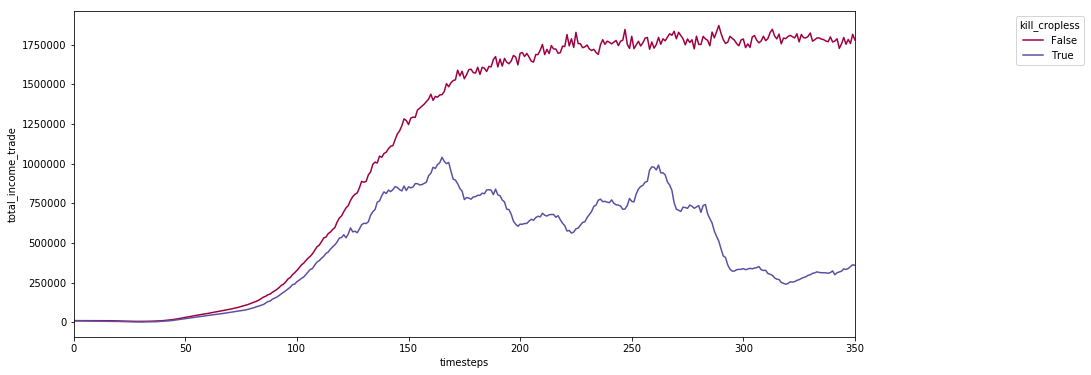

In [19]:


key=['total_income_agriculture']
level=['observables']
unstack = ['kill_cropless']

plotlines(data, level, key, unstack)

key=['total_income_ecosystem']
level=['observables']
unstack = ['kill_cropless']

plotlines(data, level, key, unstack)

key=['total_income_trade']
level=['observables']
unstack = ['kill_cropless']

plotlines(data, level, key, unstack)

Curiously, the total output of agriculture is higher, if cities whithout agriculure die.
For the other outputs, leaving settlements without agriculture alive increases the output.

Apparently, climate variability has big impact on Income from agriculture, little impact on income from ecosystems and no impact on income from trade.
All of this leaves me wondering 
* 1) if trade links are removed propperly when cities population shrinks.
It looks as if trade links only vanish if settlements die. Check this!
* 2) What impact the decay of the ecosystem and climate variability actually has on the income from ecosystem services. It seems like the impact ist negligible and in the original model, the impact came primarily from loss of settlements. **More details on this in experiment 4**
* 3) If this behavior depends on the weights of income from agriculture and ecosystem services relative to the income from trade. **More on this in Experiment 2**

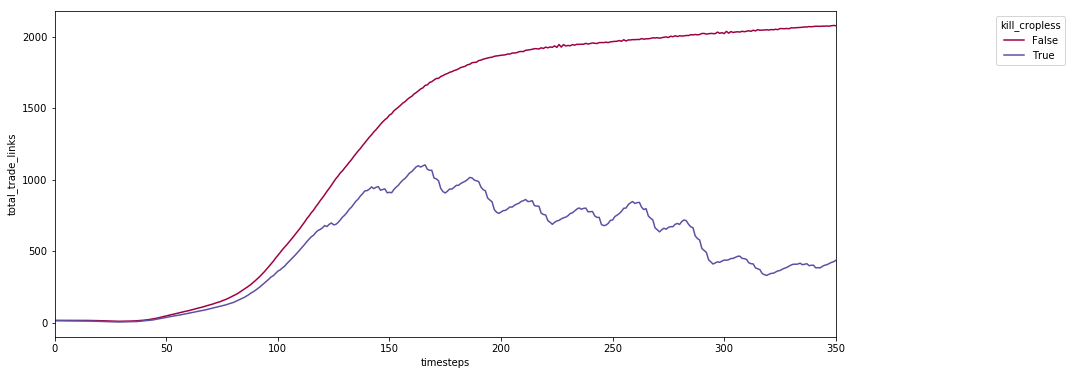

In [20]:
key=['total_trade_links']
level=['observables']
unstack = ['kill_cropless']

plotlines(data, level, key, unstack)

So, apparently the net number of trade links does not decrease. A more indepth inquiry of this follows in **Experiment 3**
